In [36]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,RocCurveDisplay,roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import pandas as pd 
import numpy as np
import random


In [ ]:
PATHNAME = './creditcard.csv'

In [37]:
def loadData():
  df = pd.read_csv(PATHNAME).dropna()
  X = df.drop(df.columns.values[-1:],axis=1)
  y = df.drop(df.columns.values[:-1],axis=1)
  y_minority = 1
  return X.to_numpy(),y.to_numpy(), y_minority

In [42]:
'''
  Analysing dataset
'''
X,y,y_minority = loadData()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_train = y_train.ravel()
y_test = y_test.ravel()
print(len(X_test[np.all([y_test==1],axis=0)]))
print(len(X_test[np.all([y_test==0],axis=0)]))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

55
19374
(77712, 30) (77712,) (19429, 30) (19429,)


In [24]:
model_old = KNeighborsClassifier()
model_old.fit(X_train,y_train)
y_predict = model_old.predict(X_test)
tp = 0
tn = 0
fp = 0
fn = 0

for i in range(len(y_test)):
  if y_test[i] != y_minority and y_predict[i] != y_minority:
    tn += 1
    y_test[i] = 0
    y_predict[i] = 0
  elif y_test[i] != y_minority and y_predict[i] == y_minority:
    fp += 1
    y_test[i] = 0
    y_predict[i] = 1
  elif y_test[i] == y_minority and y_predict[i] != y_minority:
    fn += 1
    y_test[i] = 1
    y_predict[i] = 0
  elif y_test[i] == y_minority and y_predict[i] == y_minority:
    tp += 1
    y_test[i] = 1
    y_predict[i] = 1

print('True  + : ',tp)
print('True  - : ',tn)
print('False + : ',fp)
print('False - :',fn)

# print('Precision : ',tp/(tp+fp))
# print('Recall : ',tp/(tp+fn))


True  + :  0
True  - :  19374
False + :  0
False - : 55


Old 55
True  + :  0
True  - :  19374
False + :  0
False - : 55
Precision :  0.0
Recall :  0.0


New 19531
True  + :  19069
True  - :  18192
False + :  1045
False - : 462
Precision :  0.9480461370189918
Recall :  0.9763452972198045




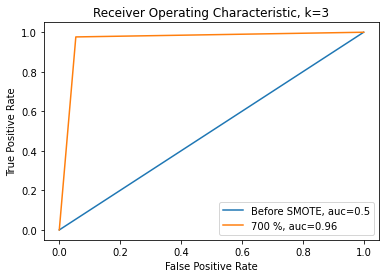

In [41]:
oversampling_percentage = [400,500,600,700]
k_values = [3]

X,y, y_minority = loadData()

for k in k_values:
  y = y.ravel()
  old_X = X
  old_y = y
  X_train,X_test,y_train,y_test = train_test_split(old_X,old_y,test_size=0.2,random_state=0)
  y_train = y_train.ravel()
  y_test = y_test.ravel()
  print('Old',len(X_test[np.all([y_test==1],axis=0)]))

  model_old = KNeighborsClassifier()
  model_old.fit(X_train,y_train)
  y_predict = model_old.predict(X_test)
  tp = 0
  tn = 0
  fp = 0
  fn = 0

  for i in range(len(y_test)):
    if y_test[i] != y_minority and y_predict[i] != y_minority:
      tn += 1
      y_test[i] = 0
      y_predict[i] = 0
    elif y_test[i] != y_minority and y_predict[i] == y_minority:
      fp += 1
      y_test[i] = 0
      y_predict[i] = 1
    elif y_test[i] == y_minority and y_predict[i] != y_minority:
      fn += 1
      y_test[i] = 1
      y_predict[i] = 0
    elif y_test[i] == y_minority and y_predict[i] == y_minority:
      tp += 1
      y_test[i] = 1
      y_predict[i] = 1

  print('True  + : ',tp)
  print('True  - : ',tn)
  print('False + : ',fp)
  print('False - :',fn)

  print('Precision : ',tp/max(1,tp+fp))
  print('Recall : ',tp/max(1,tp+fn))
  print()
  print()

  fpr, tpr, thresholds = roc_curve(y_test, y_predict)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr,tpr,label='Before SMOTE, auc='+str(round(roc_auc, 2)))

  # WITH SMOTED DATA
  # sm = SMOTE(random_state=0) 
  new_X, new_y = SMOTE().fit_resample(old_X,old_y.ravel())
  X_train,X_test,y_train,y_test = train_test_split(new_X,new_y,test_size=0.2,random_state=0)
  y_train = y_train.ravel()
  y_test = y_test.ravel()
  print('New',len(X_test[np.all([y_test==1],axis=0)]))
  model_old = KNeighborsClassifier()
  model_old.fit(X_train,y_train)
  y_predict = model_old.predict(X_test)
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for i in range(len(y_test)):
    if y_test[i] != y_minority and y_predict[i] != y_minority:
      tn += 1
      y_test[i] = 0
      y_predict[i] = 0
    elif y_test[i] != y_minority and y_predict[i] == y_minority:
      fp += 1
      y_test[i] = 0
      y_predict[i] = 1
    elif y_test[i] == y_minority and y_predict[i] != y_minority:
      fn += 1
      y_test[i] = 1
      y_predict[i] = 0
    elif y_test[i] == y_minority and y_predict[i] == y_minority:
      tp += 1
      y_test[i] = 1
      y_predict[i] = 1
  print('True  + : ',tp)
  print('True  - : ',tn)
  print('False + : ',fp)
  print('False - :',fn)
  print('Precision : ',tp/(tp+fp))
  print('Recall : ',tp/(tp+fn))
  fpr, tpr, thresholds = roc_curve(y_test, y_predict)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr,tpr,label=str(os_percent)+' %, auc='+str(round(roc_auc, 2)))
  print()
  print()
  plt.title('Receiver Operating Characteristic, k='+str(k))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend()
  plt.show()
